## Continuous

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data import synthesize_data
import expectation_reflection as ER
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=20,regu=0.)
        y_pred = ER.predict(X_test,h0,w)
        y_pred_train = ER.predict(X_train,h0,w)

    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)   
            
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
    accuracy = accuracy_score(y_test,y_pred)                
                  
    return accuracy

In [4]:
def compare_inference(X,y,train_size):
    npred = 500
    accuracy = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        #X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)
        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = inference(X_train,y_train,X_test,y_test,method)
            
    return accuracy.mean(axis=1),accuracy.std(axis=1)

In [5]:
n = 40 ; g = 10.
    
list_train_size = [0.8,0.6,0.4,0.2]
list_methods=['logistic_regression','naive_bayes','random_forest','decision_tree','expectation_reflection']

In [6]:
l = 500
X,y,w0 = synthesize_data(l,n,g,data_type='continuous')
print(np.unique(y,return_counts=True))
X, y = shuffle(X, y)

(array([-1.,  1.]), array([252, 248]))


In [7]:
acc = np.zeros((len(list_train_size),len(list_methods)))
acc_std = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:],acc_std[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.88582 0.85782 0.78404 0.63016 0.92444]
0.6 [0.87038 0.84648 0.77436 0.62272 0.91512]
0.4 [0.84844 0.82342 0.7539  0.61182 0.89688]
0.2 [0.79464 0.7731  0.70846 0.59618 0.8368 ]


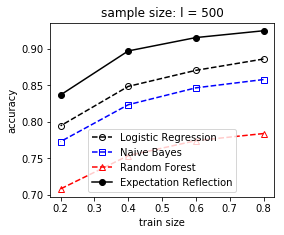

In [8]:
plt.figure(figsize=(4,3.2))
  
plt.title("sample size: l = %s"%l) 
plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
#plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
plt.plot(list_train_size,acc[:,-1],'k-',marker='o',label='Expectation Reflection')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.legend()

In [9]:
l = 1000
X,y,w0 = synthesize_data(l,n,g,data_type='continuous')
print(np.unique(y,return_counts=True))
X, y = shuffle(X, y)

(array([-1.,  1.]), array([489, 511]))


In [10]:
acc = np.zeros((len(list_train_size),len(list_methods)))
acc_std = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:],acc_std[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.92467 0.87988 0.75489 0.65066 0.92814]
0.6 [0.91879 0.86501 0.75226 0.64197 0.92344]
0.4 [0.90591 0.84143 0.74733 0.6329  0.91467]
0.2 [0.86545 0.79414 0.72428 0.61202 0.88389]


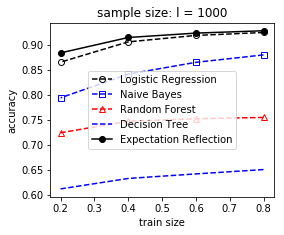

In [11]:
plt.figure(figsize=(4,3.2))
  
plt.title("sample size: l = %s"%l) 
plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
plt.plot(list_train_size,acc[:,-1],'k-',marker='o',label='Expectation Reflection')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.legend()

In [12]:
l = 2000
X,y,w0 = synthesize_data(l,n,g,data_type='continuous')
print(np.unique(y,return_counts=True))
X, y = shuffle(X, y)

(array([-1.,  1.]), array([1037,  963]))


In [13]:
acc = np.zeros((len(list_train_size),len(list_methods)))
acc_std = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:],acc_std[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.94348  0.920105 0.80364  0.66926  0.94243 ]
0.6 [0.939985 0.91223  0.80125  0.657775 0.941255]
0.4 [0.93334  0.89612  0.794045 0.64773  0.93729 ]
0.2 [0.914855 0.865265 0.77761  0.63342  0.925285]


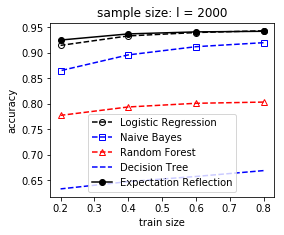

In [14]:
plt.figure(figsize=(4,3.2))
  
plt.title("sample size: l = %s"%l) 
plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
plt.plot(list_train_size,acc[:,-1],'k-',marker='o',label='Expectation Reflection')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.legend()